## Usage notes
This toolkit works in the following order:

- Set up the input data
- Create model (SM, MOSM, CSM, SM-LMC, CG)
- Make an estimation of the model parameters using BNSE+SM
- Train the model parameters
- Set the prediction range
- Do a prediction

For example:
```
import mogptk

x, y = get_your_data()

data = mogptk.Data()
data.add(x, y)

mosm = mogptk.MOSM(data, Q=3)
mosm.init_params()
mosm.train()

mosm.set_prediction_range(0, 0.0, 5.0, n=200)
x_pred, mu_pred, var_pred = mosm.predict()
```

In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

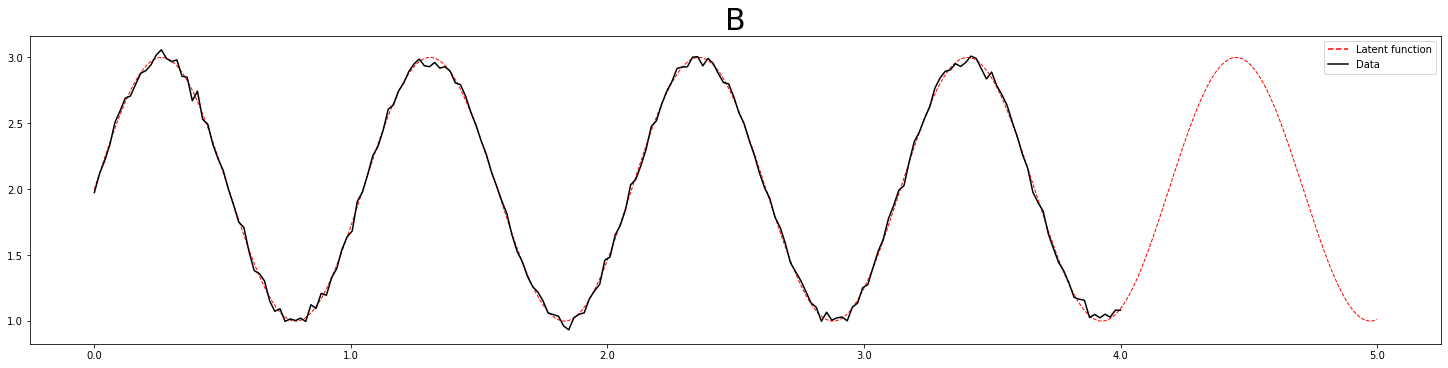

In [2]:
#data = mogptk.Data()
#data.load_csv('data/jura.csv', ['X', 'Y'], ['Cd'])#, 'Cu'])
#data.remove_range('Cd', start=2.0, end=None)
#data.remove_randomly('Cd', pct=0.90)

#data.add_function(lambda x: np.sin(6*x[:,0]) + np.cos(6*x[:,1]), n=200, start=[0.0,0.0], end=[4.0,4.0])
data = mogptk.LoadFunction(lambda x: np.sin(6*x[:,0])+2, n=200, start=0.0, end=4.0, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')
#data.remove_range('A', start=2.0, end=None)

data.set_pred_range(0.0, 5.0, n=200)

data.plot()

In [ ]:
data.transform(mogptk.TransformLog)
data.plot()

In [ ]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

In [ ]:
sm.estimate_params()
display(sm.get_params())
sm.plot_psd()

In [ ]:
sm.train(method='BFGS')
display(sm.get_params())
sm.plot_psd()

In [ ]:
sm.predict(plot=True)

## MOSM

In [3]:
mosm = mogptk.MOSM(data, Q=3)
mosm.print_params()

Instructions for updating:
Colocations handled automatically by placer.


,magnitude,mean,variance,delay,phase,noise
Q,,,,,,
0,[-0.5531055465810226],[[0.6351196348262746]],[[0.28130360430972834]],[[0.0]],[0.0],NaN
1,[2.174841932080435],[[-0.7981285456006927]],[[0.006302181624697201]],[[0.0]],[0.0],NaN
2,[0.6899270382986198],[[-0.8832817190642657]],[[0.15538630579217538]],[[0.0]],[0.0],NaN
3,NaN,NaN,NaN,NaN,NaN,[0.32886951652368956]


In [4]:
mosm.estimate_params(method='SM')
mosm.print_params()

Instructions for updating:
Use tf.cast instead.
         Current function value: -394.805009
         Iterations: 82
         Function evaluations: 194
         Gradient evaluations: 183
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -394.805009
  Number of iterations: 82
  Number of functions evaluations: 194
Done in 0.0 minutes


,magnitude,mean,variance,delay,phase,noise
Q,,,,,,
0,[1.0],[[6.001994785213097]],[[2.3581581661410697e-06]],[[0.0]],[0.0],NaN
1,[1.0],[[6.283185307185431e-06]],[[2.0000000102140517e-06]],[[0.0]],[0.0],NaN
2,[1.0],[[0.0005328546151717408]],[[2e-06]],[[0.0]],[0.0],NaN
3,NaN,NaN,NaN,NaN,NaN,[0.016814740775803513]


In [5]:
mosm.train()
mosm.print_params()

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -394.116957
  Number of iterations: 11
  Number of functions evaluations: 19
Done in 0.0 minutes


,magnitude,mean,variance,delay,phase,noise
Q,,,,,,
0,[7.772525066796059],[[6.002292117587858]],[[6.007563517060181e-06]],[[0.0]],[0.0],NaN
1,[11.926622363151568],[[6.283185212323484e-06]],[[1.1335918335364022e-05]],[[0.0]],[0.0],NaN
2,[11.9266023834374],[[0.0005327731284600153]],[[1.133556544218858e-05]],[[0.0]],[0.0],NaN
3,NaN,NaN,NaN,NaN,NaN,[0.00094007071619222]


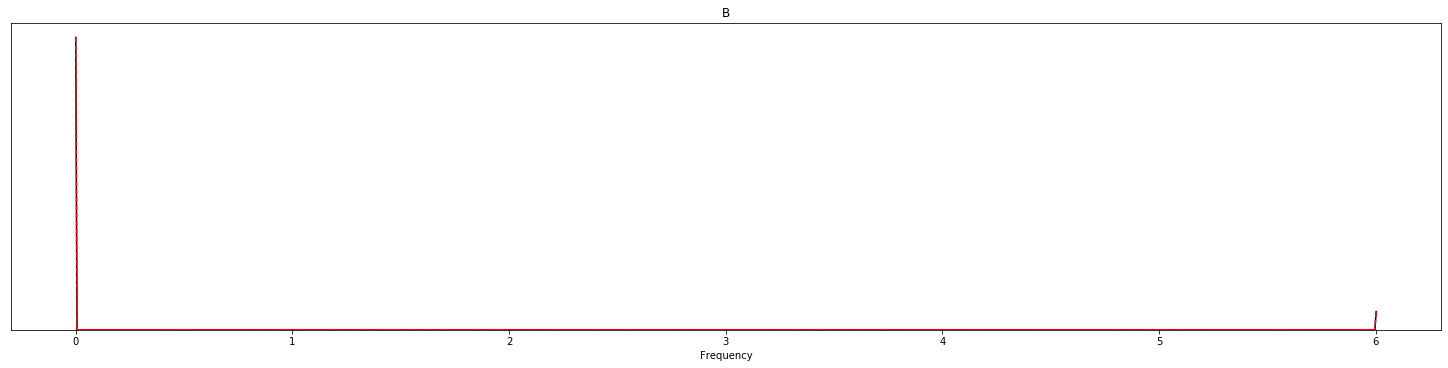

In [6]:
mosm.plot()

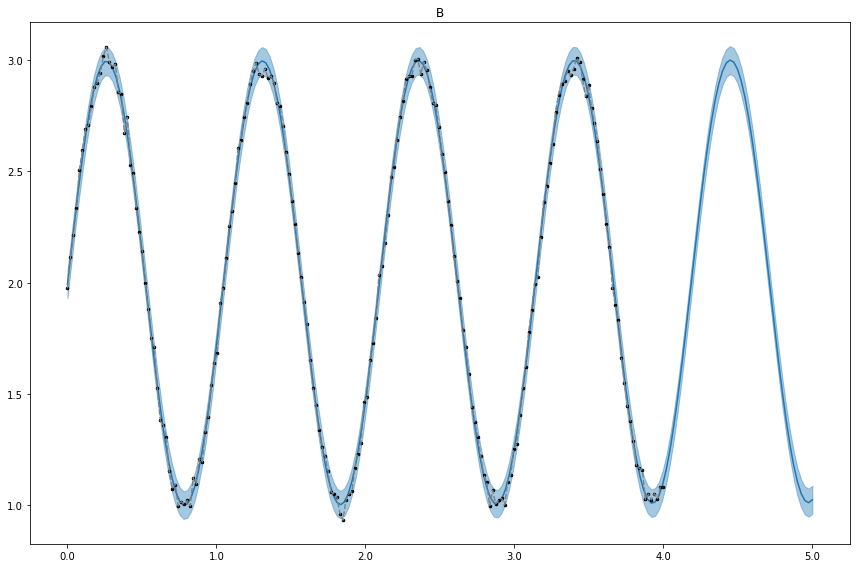

In [7]:
mosm.predict(plot=True)

### Saving and loading

In [17]:
mosm.save_params('mosm')
mosm.print_params()

                             class prior transform  trainable shape  \
GPR/likelihood/variance  Parameter  None  +ve       True       ()     

                         fixed_shape                  value  
GPR/likelihood/variance  True         3.927345783224162e-06  


,magnitude,mean,variance,delay,phase,noise
Q,,,,,,
0,[7.772525066796059],[[6.002292117587858]],[[6.007563517060181e-06]],[[0.0]],[0.0],NaN
1,[11.926622363151568],[[6.283185212323484e-06]],[[1.1335918335364022e-05]],[[0.0]],[0.0],NaN
2,[11.9266023834374],[[0.0005327731284600153]],[[1.133556544218858e-05]],[[0.0]],[0.0],NaN
3,NaN,NaN,NaN,NaN,NaN,[0.00094007071619222]


In [13]:
mosm2 = mogptk.MOSM(data, Q=3)
mosm2.load_params('mosm')
mosm2.print_params()

,magnitude,mean,variance,delay,phase,noise
Q,,,,,,
0,[7.772525066796059],[[6.002292117587858]],[[6.007563517060181e-06]],[[0.0]],[0.0],NaN
1,[11.926622363151568],[[6.283185212323484e-06]],[[1.1335918335364022e-05]],[[0.0]],[0.0],NaN
2,[11.9266023834374],[[0.0005327731284600153]],[[1.133556544218858e-05]],[[0.0]],[0.0],NaN
3,NaN,NaN,NaN,NaN,NaN,[0.00094007071619222]


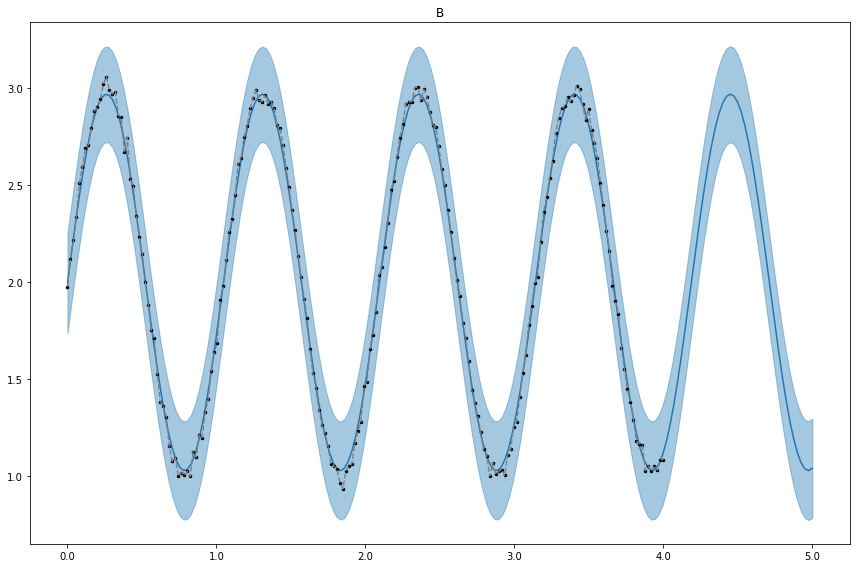

In [14]:
mosm2.predict(plot=True)

## SM-LMC

In [ ]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
smlmc.print_params()

In [ ]:
smlmc.estimate_params(method='SM')
smlmc.print_params()

In [ ]:
smlmc.train()
smlmc.print_params()

In [ ]:
smlmc.predict(plot=True)

## CSM

In [ ]:
csm = mogptk.CSM(data, Q=3, Rq=1)
csm.print_params()

In [ ]:
csm.estimate_params(method='SM')
csm.print_params()

In [ ]:
csm.train()
csm.print_params()

In [ ]:
csm.predict(plot=True)

## CONV

In [ ]:
conv = mogptk.CONV(data, Q=3)
conv.print_params()

In [ ]:
conv.estimate_params(method='SM')
conv.print_params()

In [ ]:
conv.train(method='Adam')
conv.print_params()

In [ ]:
conv.predict(plot=True)